# <a name='link3'>**Normal Distribution**</a>





### Context

Companies worth or its total market value is called market capitalization or market cap. It can be obtained by mutliplying stock price and shares outstanding. Stock price is a proportional and relative  value of companies growth. Here, analysing the stock price data will help us to understand the companies growth. Increase in stock price increases the companies market value

 


### Problem statement:

 We have Collected the latest data of Microsoft Stock price and calculated daily log return and it   is approximately  normally distributed. Let us try to answer some of the question which will help us to decide roughly whether to invest in the Microsoft shares or not ?

a) What is the probability that the stock price will drop over 5% in a day? 

b) What is the probability that the stock price will drop over 10% in a day?
 
c) What is the probability that the stock price will drop over 50% in a year? 

d) What is the probability that the stock price will drop over 25% in a year?

e) What is the 50th percentile  of the stock price?


### Data Description:

Stock price data of Microsoft  is collected from [Yahoo finance](https://finance.yahoo.com/quote/MSFT/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAACSI6SR_7Lby3ssAYvSwbF4Vrasme85BzSE1On02J71Ft-9OAY7hldPaYfYfqY4cCXkAj2PzEpzcLOBo3Usc4RC37eM4jZI5bqXmsXoAdEWXXDKLtJpZI4GK2EAXM8HRWFhkkkUckOoyxvcw66UVWlAnUMRswLPnIPNivRXivisH). It has four main attributes, as follows:

1. **Date:** Date of the stock price 

2. **Open:** The average value of opened price on the particular day 

3. **Close:**  The average value of closed  price on the particular day  

4. **Low:** The lowest price that was reached, that particular day

5. **High:**The highest price that was reached, that particular day

### Importing libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Reading the Data into the Dataframe

In [3]:
ms = pd.read_csv('MSFT.csv')
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-10,162.820007,163.220001,161.179993,161.339996,159.648727,20725900
1,2020-01-13,161.759995,163.309998,161.259995,163.279999,161.568405,21626500
2,2020-01-14,163.389999,163.600006,161.720001,162.130005,160.430450,23477400
3,2020-01-15,162.619995,163.940002,162.570007,163.179993,161.469452,21417900
4,2020-01-16,164.350006,166.240005,164.029999,166.169998,164.428116,23865400


### Log Daily return :


Log returns are defined as the calculation of return on investment using logarithm. It  gives a clearer picture about the overall returns  better than the arithmetic formula  that we use for returns in everyday life.

Day 1: Rs 100

Day 2: Rs 150

Day 3: Rs 75

Calculation of returns using arithmetic return calculation:

Return= (Final Value - Initial value)/Initial Value

Return on Day 2: (150-100)/100 =0.50 that is 50%

Return on Day 3: (75-150)/150= -0.50 that is -50%

Overall return: (75-100)/100= -0.25 that is -25%

Here it shows  you gained 50% on day 2 and had a loss of 50% on day 3. It looks like you are at neither loss, nor gain point. But actually you are at a loss of 25% on Day 3 compared to Day 1. Arithmetic returns fails here.

Let us calculate the returns using Log Returns Formula

Log Return= ln(Final Value) – ln(Initial value)

Return on Day 2: ln 150- ln 100= 5.01 – 4.60= 0.41

Return on Day 3: ln 75- ln 150= 4.32- 5.01= -0.69

Overall return: ln 75- ln 100 = 4.32- 4.60= -0.28

In term of log returns your return for day 2 is 0.41 and for Day 3 is -0.69. So it is clearly visible that your loss on Day 3 is more than the gain on Day 2. You should get overall return as -0.28 on Day 3 however you calculate - either by adding the daily returns or by using the formula (ln75- ln100).

This is not true in case of arithmetic returns where you get “0” by adding daily returns but actually -25% in the above example. A log daily return gives clearer picture of returns of an investment.

In [4]:
# let's calculate log daily return for Microsoft data
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

In [5]:
ms['LogReturn']

0      0.011953
1     -0.007068
2      0.006455
3      0.018158
4      0.005581
         ...   
247    0.000964
248   -0.026271
249    0.028060
250    0.006074
251         NaN
Name: LogReturn, Length: 252, dtype: float64

### *Calculating* the mean and standard deviation (Parameters) of the data 

In [6]:
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

### Plotting the Distribution 

It  will help us analyse the shape of data distribution and PDF of normal distribution using the calculated parameters ( mu and sigma ) from data

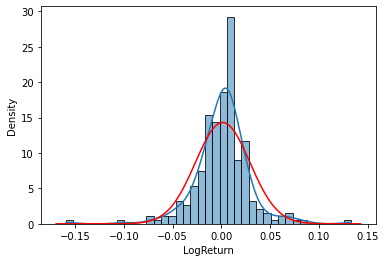

In [24]:
# Plot a histogram to show the distribution of log return of Microsoft's stock. 

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

sns.histplot(ms['LogReturn'], kde = True, stat = 'density')
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

**Insight:**  As you  can see in the above plot, there are two curves red and blue. Blue curve represents the shape of data distribution and red curve represnts the PDF ( Probability density function ). This data is approximately normal. Thus, We can assume this data distribution as normal and apply other calculation of PDF and CDF based on normality assumption

As we already discussed that stock price represents the growth of the company and increasing or decreasing of stock price will effect the market value of the company. If anyone  would like  to buy the shares of the company then he  will  be interested in knowing the probability of increment or decrement of stock price. This probability can be calculated using CDF. Lets understand CDF.


**CDF:** of a Random variable ( X ) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as -

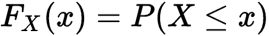

In our case, Random Variable ( X ) is log daily return and suppose, we are interested in calculating the probability of 5% decrement (-5% increment)  in stock price. Mathematically, It can be represented as 

### P(X<=-0.05 )

As discussed, The above probability can be calculated using CDF. scipy.stats provides a function called cdf() to calculate the CDF of any distribution. Here, we assumed our data to be normal distribution so we can use norm.cdf()






Calculate the probability that the stock price will drop by a certain percentage in a day




In [ ]:
# probability that the stock price of microsoft will drop over 10% in a day
p_return2 = norm.cdf(-0.10, mu, sigma)
print('The Probability is ', p_return2)

The Probability is  0.00014286950002576163


Calculate the probability of the stock price will drop over a certain percentage in a year

In [ ]:
# drop over 50% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.5, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.031356238615463994


What is the 50th percentile of the stock price?

In [ ]:
norm.ppf(0.50, loc=mu220, scale=sigma220)

0.2702974716774153

### Conclusion: 

 From the above calculation, It is clear that the probability of decrement in stock price of Microsoft is very less. Therefore, It is safe to invest in buying the shares of Microsoft